In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [12]:
import numpy as np
from image2image_io.readers import get_simple_reader
from image2image_io.readers._czi import CziFile, get_czi_thumbnail

import matplotlib.pyplot as plt

In [3]:
path = r"/Users/lgmigas/Documents/GoodSync/2025_08_CZI/250626_hukid1_preAF.czi"

czi = CziFile(path)

In [36]:
reader = get_simple_reader(path, init_pyramid=False, scene_index=0)

In [9]:
array, scale = get_czi_thumbnail(reader.fh, reader.scale)
scale

(41.65335795153592, 41.65335795153592)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..58847].


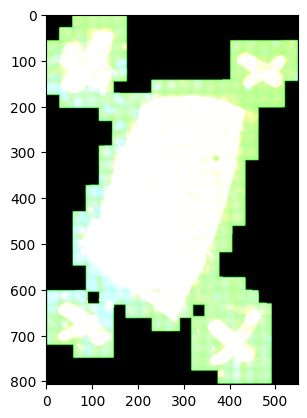

In [14]:
plt.imshow(np.swapaxes(array, 0, -1))

In [19]:
data = reader.fh.asarray()

In [22]:
data.shape

(1, 3, 35076, 51544, 1)

In [20]:
data2 = reader.fh.asarray_alt()

Reading subblocks: 100%|██████████| 927/927 [00:08<00:00, 105.08block/s]


In [23]:
data2.shape

(1, 3, 35076, 51544, 1)

In [24]:
reader.fh.shape

(1, 3, 35076, 51544, 1)

In [27]:
axes = list(reader.fh.axes)
shape = list(reader.fh.shape)
orig_shape = list(reader.fh.shape)
axes, shape, orig_shape

(['S', 'C', 'Y', 'X', '0'], [1, 3, 35076, 51544, 1], [1, 3, 35076, 51544, 1])

In [28]:
all_axes = list(axes)
yx_dims = np.where(np.isin(all_axes, ["Y", "X"]) == 1)[0].tolist()
yx_shape = np.array(shape[slice(yx_dims[0], yx_dims[1] + 1)])
all_axes, yx_dims, yx_shape

(['S', 'C', 'Y', 'X', '0'], [2, 3], array([35076, 51544]))

In [33]:
np.squeeze(data).shape

(3, 35076, 51544)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65535].


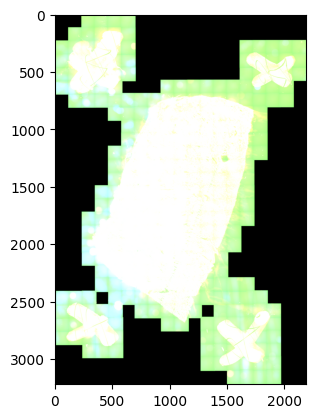

In [43]:
plt.imshow(np.swapaxes(reader.pyramid[-2], 0, -1))